In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data, cleaning column names & graph settings

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'})
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Graph Settings

In [6]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

# Part 1: Explaratory Data Analysis (EDA)

## 1.1 Plotting average annual income by age (bar chart)

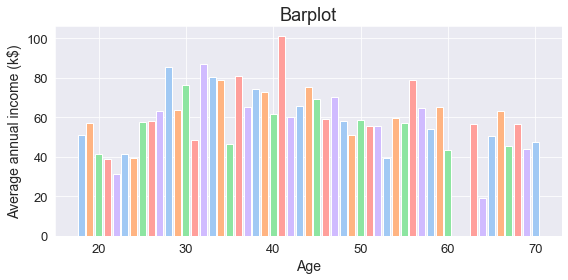

In [7]:
barplot = df.groupby(['Age'], as_index=False).mean()[['Age', 'Income']]

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['Age'], barplot['Income'], color=colors[:5])
plt.xlabel('Age')
plt.ylabel('Average annual income (k$)')
plt.title('Barplot')
plt.show()

## 1.2 Plotting annual income by age differentiated by gender (scatter plot)

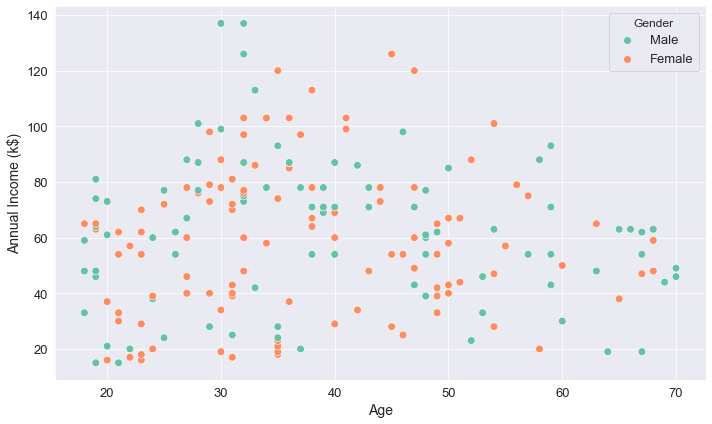

In [9]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='Age', y='Income',   hue='Gender', palette='Set2', s=60)
ax.set(xlabel='Age', ylabel='Annual Income (k$)')
ax.legend(title='Gender', title_fontsize = 12) 
plt.show()

 Based on the plot above we can see that there is no linear pattern and thus we can appropriate a customer segmentation through KMeans

## 1.3 Plotting annual income by spending score differentiated by gender 

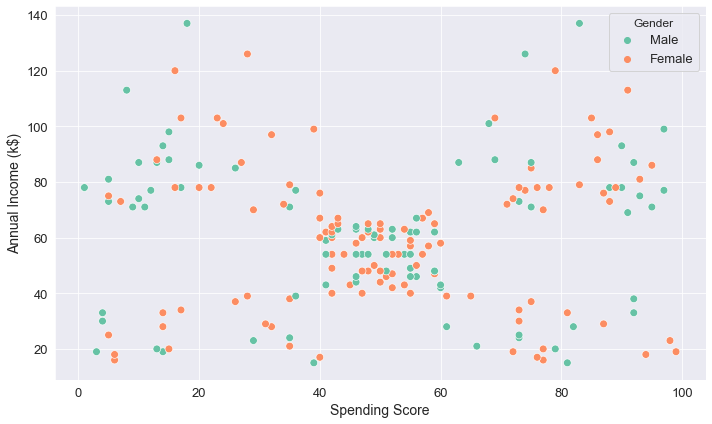

In [10]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='Score', y='Income',   hue='Gender', palette='Set2', s=60)
ax.set(xlabel='Spending Score', ylabel='Annual Income (k$)')
ax.legend(title='Gender', title_fontsize = 12) 
plt.show()

## 1.4 Plotting spending score by age differentiated by gender

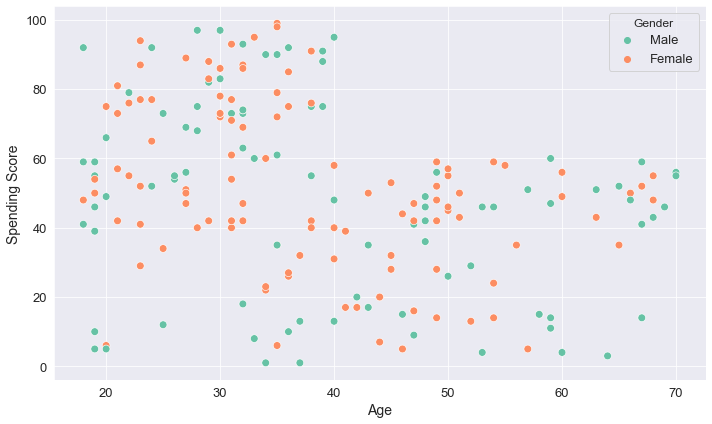

In [11]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='Age', y='Score',   hue='Gender', palette='Set2', s=60)
ax.set(xlabel='Age', ylabel='Spending Score')
ax.legend(title='Gender', title_fontsize = 12) 
plt.show()

Comparing the spending score and age, we can see that ages 18 to about 40 has a high spending score in the ranges of 40 to 100. 

# Part 2: Feature Engineering

In [12]:
# Converting categorical variables into numeric variables
gender = {"Gender": {"Male": 0, "Female": 1}}
df = df.replace(gender)

In [13]:
df.head()

,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Standardisation

In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[['Age', 'Income', 'Score']])

# Part 3: Customer Segmentation (KMeans)

## 3.1 Plotting an error curve to determine number of clusters

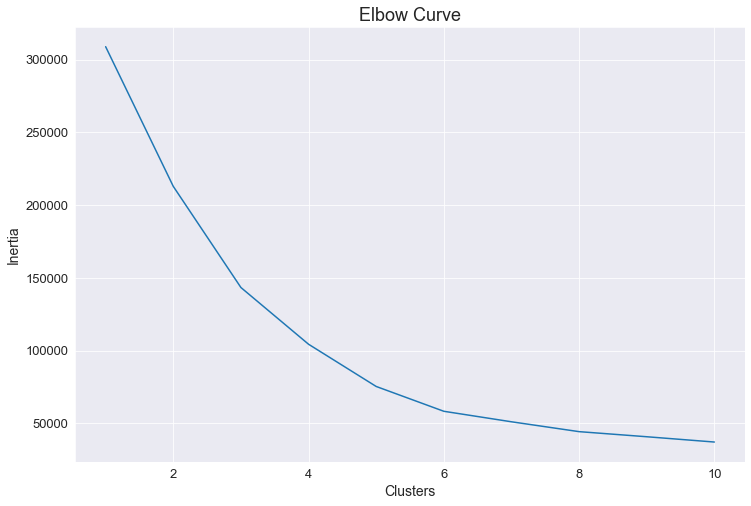

In [17]:
from sklearn.cluster import KMeans

X = df.copy() 
clusters = [] # list to store the cluster labels

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X) # n_clusters = number of clusters
    clusters.append(km.inertia_) # inertia_ = sum of squared distances of 
                                 # samples to their closest cluster center

# Plotting the elbow curve   
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Curve')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

## 3.2 Building the model

In [18]:
# KMeans clustering
kmeans = KMeans(n_clusters=5) # 5 clusters based on the albow curve
kmeans.fit(X) # fitting the data to the model
clusters = X.copy() # copy of the input data
clusters['cluster_pred'] = kmeans.fit_predict(X) # noting the predicted clusters

## 3.3 Visualising the clusters (Annual income and spending score)

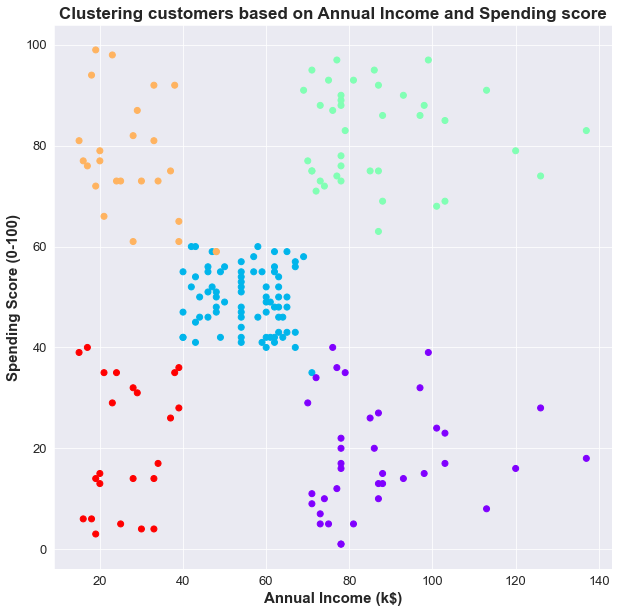

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(clusters['Income'],clusters['Score'],c=clusters['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=17,fontweight="bold")
plt.xlabel("Annual Income (k$)", fontsize=15,fontweight="bold")
plt.ylabel("Spending Score (0-100)", fontsize=15,fontweight="bold")
plt.show()

### Cluster analysis
- Orange: Low income, high spending score (60-100)
- Red: Low income, low spending score (0-40)
- Blue: Low to middle income, middle spending score (40-60)
- Green: Middle to High income, high spending score (60-100)
- Purple: Middle to High income, low spending score (0-40)

# Part 4: Analysing the clusters

## 4.1 Clusters based on attributes

In [28]:
avg_data = clusters.groupby(['cluster_pred'], as_index=False).mean()
print(avg_data)

   cluster_pred    Gender        Age     Income      Score
0             0  0.486486  40.324324  87.432432  18.189189
1             1  0.592105  43.934211  55.210526  49.447368
2             2  0.538462  32.692308  86.538462  82.128205
3             3  0.560000  24.960000  28.040000  77.000000
4             4  0.608696  45.217391  26.304348  20.913043


### Cluster analysis
- 0: Male, average age 40, 87k average annual income, low spending score
- 1: Female, average age 43, 55k average annual income, mid spending score
- 2: Female, average age 32, 86k average annual income, high spending score
- 3: Female, average age 24, 28k average annual income, high spending score
- 4: Female, average age 45, 26k average annual income, low spending score

### 4.1.1 Plotting average age with cluster number

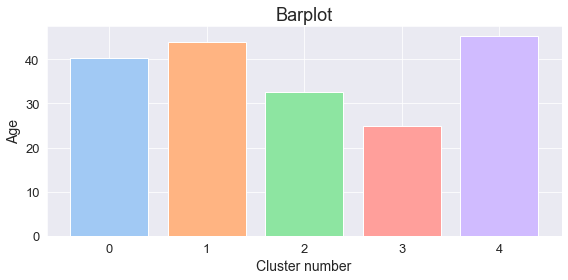

In [32]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(avg_data['cluster_pred'], avg_data['Age'], color=colors[:5])
plt.xlabel('Cluster number')
plt.ylabel('Age')
plt.title('Barplot')
plt.show()

### 4.1.2 Plotting average income by cluster number

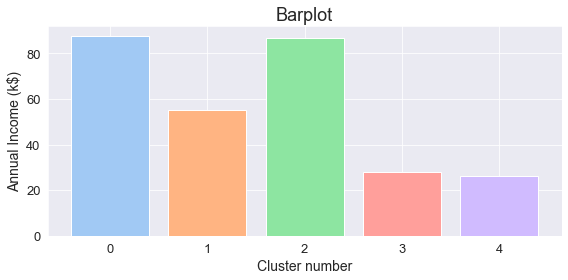

In [37]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(avg_data['cluster_pred'], avg_data['Income'], color=colors[:5])
plt.xlabel('Cluster number')
plt.ylabel('Annual Income (k$)')
plt.title('Barplot')
plt.show()

### 4.1.3 Plotting Average spending score by cluster number

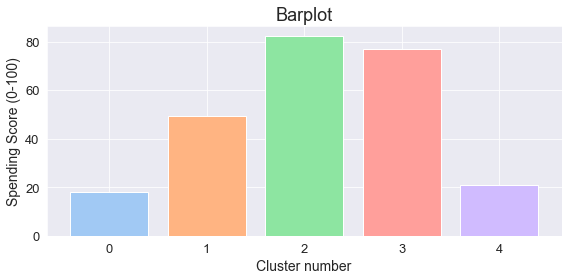

In [36]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(avg_data['cluster_pred'], avg_data['Score'], color=colors[:5])
plt.xlabel('Cluster number')
plt.ylabel('Spending Score (0-100)')
plt.title('Barplot')
plt.show()

# Part 5: Personas